In [399]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from janitor import clean_names
import pydot
import graphviz


In [400]:
data = pd.read_csv('combined_file.csv')
data = data.rename(columns={'Goals_x': 'goal_per_game', 'Goals_y': 'total_goals'})
data = clean_names(data)

In [401]:
data.head()

,unnamed_0,player,pos,team,pts,cr,plus,apps,starter,mins,...,fouls,was_fouled,yc,rc,rec_ball,tackles,clean_sheets,saves,total_goals,top_10_scorer
0,0,B. Chilwell,Defender,CHE,35.38,15.4,0.9,6,6,540,...,1.67,2.50,0.00,0.0,1.17,1.33,0.67,0.0,3,No
1,1,T. Alexander-Arnold,Defender,LIV,32.66,20.2,3.5,17,17,1504,...,0.29,0.29,0.06,0.0,2.29,1.29,0.59,0.0,2,No
2,2,Joao Cancelo,Defender,MCI,31.33,21.9,4.3,18,18,1608,...,0.89,0.44,0.28,0.0,3.28,2.00,0.56,0.0,1,No
3,3,M. Sarr,Defender,CHE,30.40,5.1,-0.4,1,1,90,...,0.00,0.00,0.00,0.0,7.00,3.00,1.00,0.0,0,No
4,4,Mohamed Salah,Attacker,LIV,30.09,19.3,-0.5,19,19,1693,...,0.32,0.74,0.05,0.0,0.42,0.47,0.58,0.0,23,Yes


In [402]:
df = data.drop(["unnamed_0","player", "team" ,"pts", "top_10_scorer"], axis=1)
data['total_goals'] = pd.to_numeric(data['total_goals'])
print(data.columns)

Index(['unnamed_0', 'player', 'pos', 'team', 'pts', 'cr', 'plus', 'apps',
       'starter', 'mins', 'goal_per_game', 'shots', 'on_tar_shots',
       'pen_goals', 'successful_dribbles', 'ast', 'acc_pass', 'key_pass',
       'fouls', 'was_fouled', 'yc', 'rc', 'rec_ball', 'tackles',
       'clean_sheets', 'saves', 'total_goals', 'top_10_scorer'],
      dtype='object')


In [403]:
print(df.columns)

Index(['pos', 'cr', 'plus', 'apps', 'starter', 'mins', 'goal_per_game',
       'shots', 'on_tar_shots', 'pen_goals', 'successful_dribbles', 'ast',
       'acc_pass', 'key_pass', 'fouls', 'was_fouled', 'yc', 'rc', 'rec_ball',
       'tackles', 'clean_sheets', 'saves', 'total_goals'],
      dtype='object')


In [404]:
df = df.drop(['goal_per_game','mins'], axis=1)

In [405]:
df.head()

,pos,cr,plus,apps,starter,shots,on_tar_shots,pen_goals,successful_dribbles,ast,...,key_pass,fouls,was_fouled,yc,rc,rec_ball,tackles,clean_sheets,saves,total_goals
0,Defender,15.4,0.9,6,6,2.17,1.00,0.00,0.50,0.17,...,1.67,1.67,2.50,0.00,0.0,1.17,1.33,0.67,0.0,3
1,Defender,20.2,3.5,17,17,1.65,0.59,0.00,0.47,0.47,...,3.12,0.29,0.29,0.06,0.0,2.29,1.29,0.59,0.0,2
2,Defender,21.9,4.3,18,18,2.22,0.83,0.00,1.22,0.22,...,1.11,0.89,0.44,0.28,0.0,3.28,2.00,0.56,0.0,1
3,Defender,5.1,-0.4,1,1,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,7.00,3.00,1.00,0.0,0
4,Attacker,19.3,-0.5,19,19,4.05,1.95,0.21,1.63,0.53,...,2.00,0.32,0.74,0.05,0.0,0.42,0.47,0.58,0.0,23


In [406]:
X = df.drop('total_goals', axis=1)
y = df['total_goals']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=11)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [407]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153 entries, 1006 to 1104
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cr                   1153 non-null   float64
 1   plus                 1153 non-null   float64
 2   apps                 1153 non-null   int64  
 3   starter              1153 non-null   int64  
 4   shots                1153 non-null   float64
 5   on_tar_shots         1153 non-null   float64
 6   pen_goals            1153 non-null   float64
 7   successful_dribbles  1153 non-null   float64
 8   ast                  1153 non-null   float64
 9   acc_pass             1153 non-null   float64
 10  key_pass             1153 non-null   float64
 11  fouls                1153 non-null   float64
 12  was_fouled           1153 non-null   float64
 13  yc                   1153 non-null   float64
 14  rc                   1153 non-null   float64
 15  rec_ball             1153 non-null 

In [408]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),  # New layer
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),  # New layer
    tf.keras.layers.Dense(1)  
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])


In [409]:
history = model.fit(X_train_scaled, y_train, epochs=5, validation_split=0.2)


Epoch 1/5


29/29 [==============================] - 0s 3ms/step - loss: 6.6612 - mean_absolute_error: 1.5886 - val_loss: 4.8707 - val_mean_absolute_error: 1.2436
Epoch 2/5
29/29 [==============================] - 0s 1ms/step - loss: 2.7528 - mean_absolute_error: 1.0179 - val_loss: 3.5687 - val_mean_absolute_error: 1.1291
Epoch 3/5
29/29 [==============================] - 0s 1ms/step - loss: 1.9538 - mean_absolute_error: 0.9009 - val_loss: 3.5259 - val_mean_absolute_error: 1.0889
Epoch 4/5
29/29 [==============================] - 0s 1ms/step - loss: 1.7000 - mean_absolute_error: 0.8170 - val_loss: 2.6384 - val_mean_absolute_error: 0.9424
Epoch 5/5
29/29 [==============================] - 0s 1ms/step - loss: 1.2953 - mean_absolute_error: 0.7344 - val_loss: 2.4717 - val_mean_absolute_error: 0.9471


In [410]:
model.evaluate(X_test_scaled, y_test)

10/10 [==============================] - 0s 560us/step - loss: 2.1227 - mean_absolute_error: 0.8247


[2.1226890087127686, 0.8246508240699768]

In [411]:
predictions = model.predict(X_test_scaled)


10/10 [==============================] - 0s 492us/step


In [412]:
features = X_train.columns

In [413]:
# One-hot encode categorical columns in `data` (assuming 'Position' is the original categorical column)
data_encoded = pd.get_dummies(data, columns=['pos'])

# Now, ensure that `data_encoded` has the same features as used in the model training
# You might need to add missing columns with zeros if they are not present in the `data` DataFrame
missing_cols = set(X_train.columns) - set(data_encoded.columns)
for col in missing_cols:
    data_encoded[col] = 0

# Ensure the order of columns matches that of the training set
data_encoded = data_encoded[X_train.columns]

# Now, you can use the model to predict
data['PredictedGoals'] = model.predict(scaler.fit_transform(data_encoded))


46/46 [==============================] - 0s 505us/step


In [414]:
data['PredictedGoals'] = round(data['PredictedGoals'])

In [415]:
top_scorer_index = data['PredictedGoals'].idxmax()
top_scorer = data.loc[top_scorer_index, ['player', 'PredictedGoals']]

top_scorer_a_index = data['total_goals'].idxmax()
top_scorer_a = data.loc[top_scorer_a_index, ['player', 'total_goals']]

print(f"The Predicted Goal scorer is {top_scorer['player']} with {top_scorer['PredictedGoals']} goals, and the actual top goal scorer is {top_scorer_a['player']} with {top_scorer_a['total_goals']} goals.")

top_scorer_indices = data['PredictedGoals'].nlargest(5).index
top_scorers = data.loc[top_scorer_indices, ['player', 'PredictedGoals']]

top_scorer_actual_indices = data['total_goals'].nlargest(5).index
top_scorers_actual = data.loc[top_scorer_actual_indices, ['player', 'total_goals']]

print("The Predicted Top 5 Goal Scorers are:")
print(top_scorers)
print("The Actual Top 5 Goal Scorers are:")
print(top_scorers_actual)


The Predicted Goal scorer is Mohamed Salah with 22.0 goals, and the actual top goal scorer is Mohamed Salah with 23 goals.
The Predicted Top 5 Goal Scorers are:
            player  PredictedGoals
964  Mohamed Salah            22.0
482        H. Kane            21.0
4    Mohamed Salah            20.0
963       J. Vardy            20.0
966    M. Rashford            19.0
The Actual Top 5 Goal Scorers are:
            player  total_goals
4    Mohamed Salah           23
37   Son Heung-Min           23
482        H. Kane           23
963       J. Vardy           23
501  Mohamed Salah           22


In [416]:
serie_test = pd.read_csv('Serie_A.csv')
serie_test = serie_test.rename(columns={'Goals_x': 'goal_per_game', 'Goals_y': 'total_goals'})
serie_test = clean_names(serie_test)
encoded1 = pd.get_dummies(serie_test, columns=['pos'])
missing = set(X_train.columns) - set(encoded1.columns)

for col in missing:
    encoded1[col] = 0

data_encoded1 = encoded1[X_train.columns]

serie_test['PredictedGoals'] = model.predict(scaler.fit_transform(serie_test[encoded1]))

serie_test['PredictedGoals'] = round(serie_test['PredictedGoals'])

top_serie_index = serie_test['PredictedGoals'].idxmax()
top_serie = serie_test.loc[top_serie_index, ['player', 'PredictedGoals']]

top_serie_a_index = serie_test['total_goals'].idxmax()
top_serie_a = serie_test.loc[top_serie_a_index, ['player', 'total_goals']]

print(f"The Predicted Goal scorer is {top_serie['player']} with {top_serie['PredictedGoals']} goals, and the actual top goal scorer is {top_serie_a['player']} with {top_serie_a['total_goals']} goals.")

ValueError: Boolean array expected for the condition, not int64

In [417]:
# Your existing code for encoding and preparing the data
serie_test = pd.read_csv('Serie_A.csv')
serie_test = serie_test.rename(columns={'Goals_x': 'goal_per_game', 'Goals_y': 'total_goals'})
serie_test = clean_names(serie_test)
encoded1 = pd.get_dummies(serie_test, columns=['pos'])
missing = set(X_train.columns) - set(encoded1.columns)

for col in missing:
    encoded1[col] = 0

data_encoded1 = encoded1[X_train.columns]

# Corrected prediction step
# Use 'data_encoded1' for the prediction
serie_test['PredictedGoals'] = model.predict(scaler.fit_transform(data_encoded1))

# Rounding off the predicted goals
serie_test['PredictedGoals'] = round(serie_test['PredictedGoals'])

# Finding the top predicted and actual goal scorers
top_serie_index = serie_test['PredictedGoals'].idxmax()
top_serie = serie_test.loc[top_serie_index, ['player', 'PredictedGoals']]

top_serie_a_index = serie_test['total_goals'].idxmax()
top_serie_a = serie_test.loc[top_serie_a_index, ['player', 'total_goals']]

# Printing the results
print(f"The Predicted Goal scorer is {top_serie['player']} with {top_serie['PredictedGoals']} goals, and the actual top goal scorer is {top_serie_a['player']} with {top_serie_a['total_goals']} goals.")


16/16 [==============================] - 0s 496us/step
The Predicted Goal scorer is V. Osimhen with 24.0 goals, and the actual top goal scorer is V. Osimhen with 26 goals.


In [418]:
top_scorer_index2 = serie_test['PredictedGoals'].idxmax()
top_scorer2 = serie_test.loc[top_scorer_index2, ['player', 'PredictedGoals']]

top_scorer_a_index2 = serie_test['total_goals'].idxmax()
top_scorer_a2 = serie_test.loc[top_scorer_a_index2, ['player', 'total_goals']]

print(f"The Predicted Goal scorer is {top_scorer2['player']} with {top_scorer2['PredictedGoals']} goals, and the actual top goal scorer is {top_scorer_a2['player']} with {top_scorer_a2['total_goals']} goals.")

top_scorer_indices2 = serie_test['PredictedGoals'].nlargest(7).index
top_scorers2 = serie_test.loc[top_scorer_indices2, ['player', 'PredictedGoals']]


top_scorer_actual_indices2 = serie_test['total_goals'].nlargest(7).index
top_scorers_actual2 = serie_test.loc[top_scorer_actual_indices2, ['player', 'total_goals']]

print("The Predicted Top 5 Goal Scorers are:")
print(top_scorers2)
print("The Actual Top 5 Goal Scorers are:")
print(top_scorers_actual2)

The Predicted Goal scorer is V. Osimhen with 24.0 goals, and the actual top goal scorer is V. Osimhen with 26 goals.
The Predicted Top 5 Goal Scorers are:
              player  PredictedGoals
1         V. Osimhen            24.0
24        M. Lautaro            18.0
0   K. Kvaratskhelia            14.0
18       D. Vlahovic            14.0
39       C. Immobile            14.0
3          P. Dybala            13.0
6        M. Zaccagni            13.0
The Actual Top 5 Goal Scorers are:
              player  total_goals
1         V. Osimhen           26
24        M. Lautaro           21
17           R. Leao           15
20        A. Lookman           13
88  M&#39;Bala Nzola           13
97         O. Giroud           13
0   K. Kvaratskhelia           12


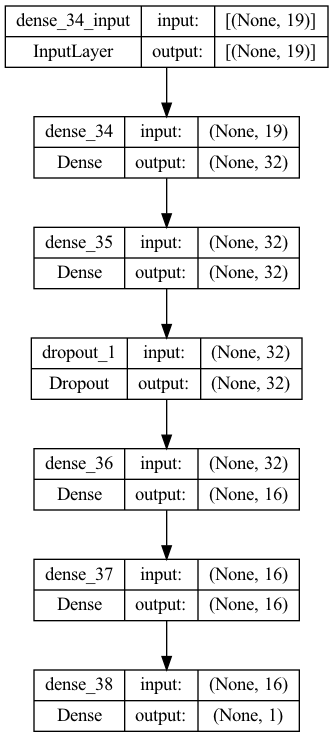

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


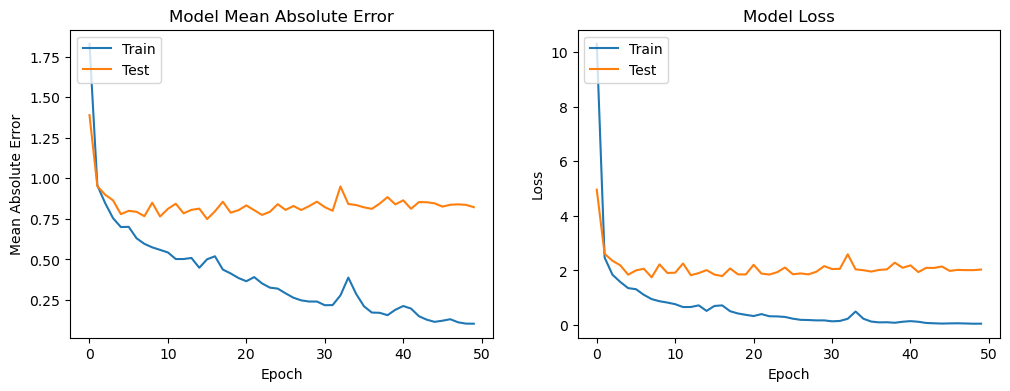

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, predictions))
rmse


1.5254812025416402

In [ ]:
from sklearn.metrics import confusion_matrix

# Convert continuous predictions to categorical if necessary
# For example, for a binary classification with a threshold of 0.5
predictions_categorical = np.rint(predictions).astype(int)
conf_matrix = confusion_matrix(y_test, predictions_categorical)


In [ ]:
accuracy = (conf_matrix[0][0] + conf_matrix[1][1]) / conf_matrix.sum()

In [ ]:
accuracy

0.47750865051903113

In [ ]:
rmse = sqrt(mean_squared_error(serie_test['total_goals'], serie_test['PredictedGoals']))
rmse

1.3349747849111413

In [ ]:
predictions_categorical2 = np.rint(serie_test['PredictedGoals']).astype(int)
conf_matrix2 = confusion_matrix(serie_test['total_goals'], predictions_categorical2)
accuracy2 = (conf_matrix[0][0] + conf_matrix[1][1]) / conf_matrix.sum()
accuracy2

0.4809688581314879